In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [3]:
%matplotlib notebook

# 1d case

In [95]:
fs = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(11):
    fs.append(h5py.File(f'1dCE\\data_serial{n}.hdf5', 'r'))

In [94]:
fs

[<HDF5 file "data_serial0.hdf5" (mode r)>,
 <HDF5 file "data_serial1.hdf5" (mode r)>,
 <HDF5 file "data_serial2.hdf5" (mode r)>,
 <HDF5 file "data_serial3.hdf5" (mode r)>,
 <HDF5 file "data_serial4.hdf5" (mode r)>,
 <HDF5 file "data_serial5.hdf5" (mode r)>]

In [67]:
fs[0]['Domain/x'].shape
print(fs[0]['Primitive'])

<HDF5 group "/Primitive" (1 members)>


In [68]:
print(fs[3]['Primitive/v'][900:1100])

[-0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3
 -0.3 

In [69]:
fs[0]['Primitive/v'].shape

(2048,)

In [70]:
fs[0]['Domain'].attrs.keys()

<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>

In [71]:
fs[0]['Optional'].attrs.keys()

<KeysViewHDF5 ['eta', 'nOptionalSimArgs', 'tau_pi']>

In [72]:
eta = fs[0]['Optional'].attrs['eta'][0]
tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
print(f"Dissipation strength {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 0.0001, relaxation time 0.0001, timestep 9.765625e-05


In [73]:
fs[-1].attrs['t']

array([1.])

<IPython.core.display.Javascript object>


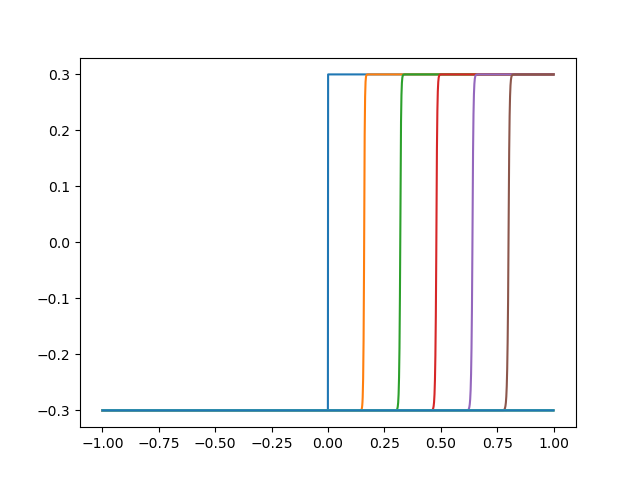

In [74]:
plt.figure()
for f in fs:
    plt.plot(f['Domain/x'], f['Primitive/v'])
plt.show()

<IPython.core.display.Javascript object>


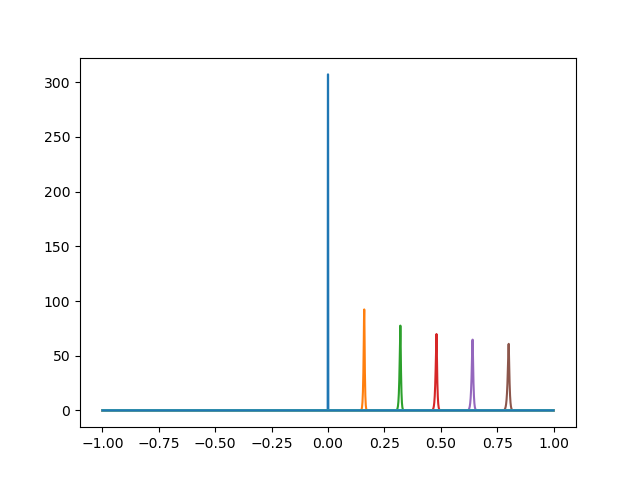

In [75]:
plt.figure()
for f in fs:
    plt.plot(f['Domain/x'], f['Auxiliary/dxv'])
plt.show()

In [77]:
Tall = np.zeros((len(fs), fs[0]['Primitive/v'].shape[0]))
for i, f in enumerate(fs):
    Tall[i, :] = f['Primitive/v']

<IPython.core.display.Javascript object>


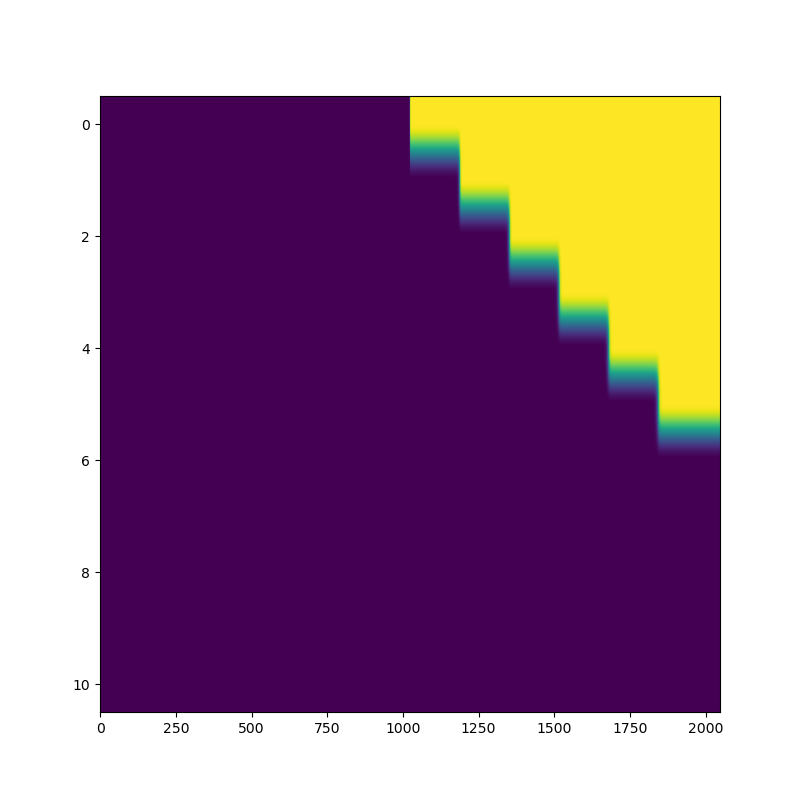

In [78]:
plt.figure(figsize=(8,8))
plt.imshow(Tall, aspect='auto')
plt.show()

This figure is all about showing that the features propagate at the expected wave speed.

<IPython.core.display.Javascript object>


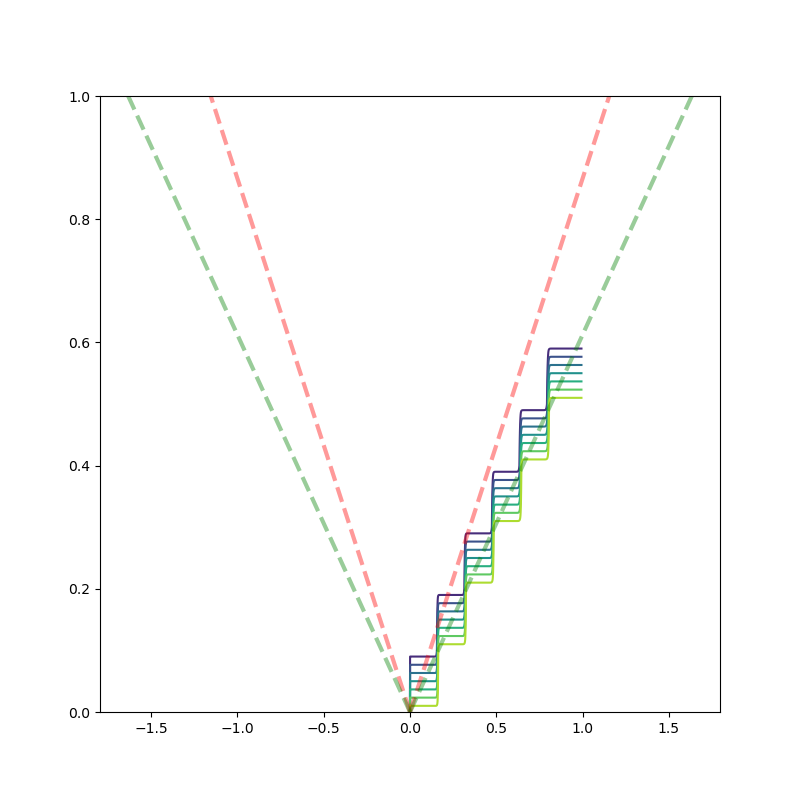

In [79]:
plt.figure(figsize=(8,8))
t = np.linspace(fs[0].attrs['t'], fs[-1].attrs['t'], len(fs)).flatten()
x = fs[0]['Domain/x']
plt.contour(x, t, Tall)
speed = np.sqrt((4*eta)/(3*tau_pi))
plt.plot(speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(-speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(np.sqrt(2)*speed*t, t, 'g--', lw=3, alpha=0.4)
plt.plot(-np.sqrt(2)*speed*t, t, 'g--', lw=3, alpha=0.4)
plt.show()

# 2d case

In [4]:
fs = []
files = sorted(glob.glob('2dCE/data*hdf5'), key=os.path.getmtime)
for f in files:
    fs.append(h5py.File(f, 'r'))

In [5]:
fs = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6):
    fs.append(h5py.File(f'2dCE\\data_serial{n}.hdf5', 'r'))

In [6]:
fs[0]['Domain'].attrs['dx']

array([0.008])

In [7]:
fs[0]['Domain/x'].shape

(250,)

In [8]:
fs[0]['Primitive/vy'].shape

(250,)

In [9]:
fs[-1]['Primitive/vy'][900:1100]

array([], dtype=float64)

In [10]:
eta = fs[0]['Optional'].attrs['eta'][0]
tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
print(f"Dissipation strength {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 0.0002, relaxation time 0.0002, timestep 0.0008


In [11]:
fs[-1].attrs['t']

array([10.])

<IPython.core.display.Javascript object>


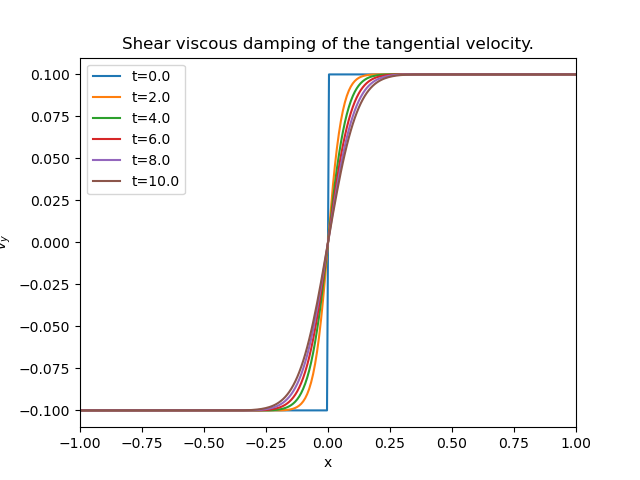

In [14]:
fig = plt.figure()
for f in fs:
    #print(f.attrs['t'][0])
    plt.plot(f['Domain/x'], f['Primitive/vy'][:], label='t=' + str(f.attrs['t'][0]))
plt.xlabel('x')
plt.ylabel('$v_{y}$')
plt.xlim(-1,1)
plt.title('Shear viscous damping of the tangential velocity.')
plt.legend()
plt.show()
fig.savefig('test.png', bbox_inches='tight')

In [15]:
files = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(11)[::2]:
    files.append(h5py.File(f'1d\\data_serial{n}.hdf5', 'r'))

<IPython.core.display.Javascript object>


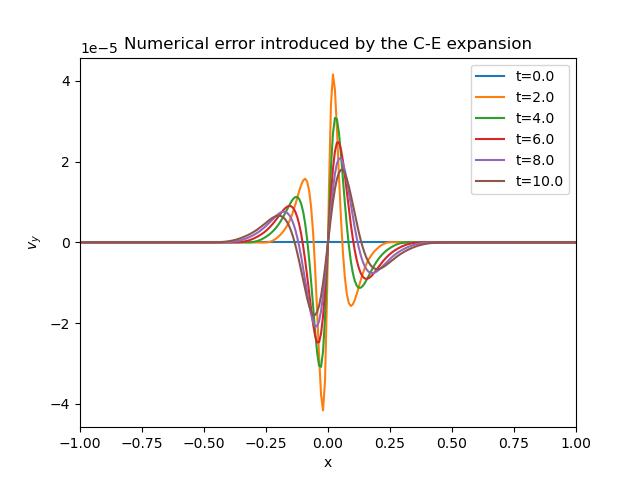

In [37]:
fig=plt.figure()
for f,fce in zip(files,fs):
    #plt.plot(f['Domain/x'], f['Primitive/vy'][:], '-', fce['Domain/x'], fce['Primitive/vy'][:], '--', label='t=' + str(f.attrs['t'][0]))
    #testline = plt.plot(fce['Domain/x'], fce['Primitive/vy'][:], label='t=' + str(f.attrs['t'][0]), linestyle='--')
    plt.plot(f['Domain/x'], f['Primitive/vy'][:] - fce['Primitive/vy'][:], label='t=' + str(f.attrs['t'][0]))
#plt.title('Shear viscous damping of the tangential velocity, overlay comparison')
plt.title('Numerical error introduced by the C-E expansion')
plt.xlabel('x')
plt.ylabel('$v_{y}$')
plt.xlim(-1,1)
plt.legend()
plt.show()
fig.savefig('vy_erf_diff.pdf', bbox_inches='tight')

In [117]:
Tall = np.zeros((len(fs), fs[0]['Primitive/vy'].shape[0]))
for i, f in enumerate(fs):
    Tall[i, :] = f['Primitive/vy']

<IPython.core.display.Javascript object>


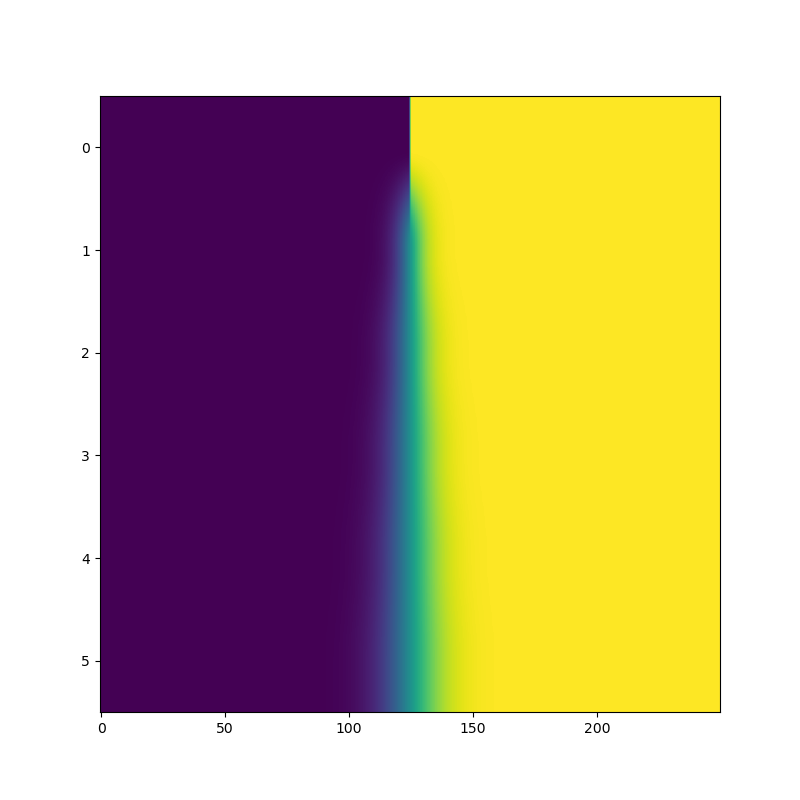

In [118]:
plt.figure(figsize=(8,8))
plt.imshow(Tall, aspect='auto')
plt.show()

<IPython.core.display.Javascript object>


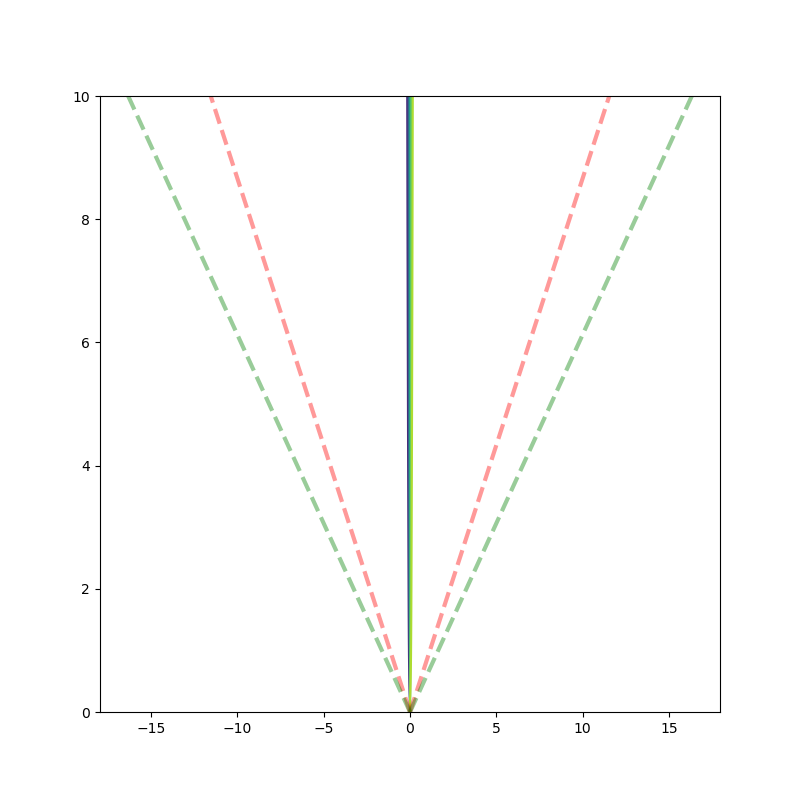

In [119]:
plt.figure(figsize=(8,8))
t = np.linspace(fs[0].attrs['t'], fs[-1].attrs['t'], len(fs)).flatten()
x = fs[0]['Domain/x']
plt.contour(x, t, Tall)
speed = np.sqrt((4*eta)/(3*tau_pi))
plt.plot(speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(-speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(np.sqrt(2)*speed*t, t, 'g--', lw=3, alpha=0.4)
plt.plot(-np.sqrt(2)*speed*t, t, 'g--', lw=3, alpha=0.4)
plt.show()

<IPython.core.display.Javascript object>


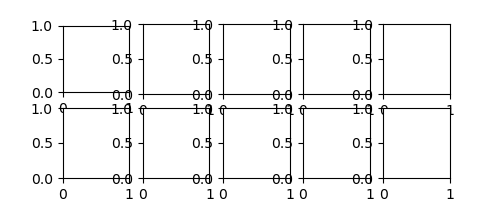

TypeError: Invalid shape (250,) for image data

In [115]:
fig, axes = plt.subplots(2, 5, figsize=(5,2))
for files, ax in zip(fs[:10], axes.flatten()):
    ax.imshow(f['Primitive/vy'], vmin=-0.5, vmax=0.5)
#     ax.set_title(f"Time {f.attrs['t'][0]:.1f}")
    ax.axis('off')
fig.tight_layout()
plt.subplots_adjust(wspace=0.02,hspace=0.02)
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/vx'].shape
plt.figure()
for i in range(len(fs)//2):
    plt.plot(fs[2*i]['Domain/x'], fs[2*i]['Primitive/vy'][:, ny//2])
    plt.plot(fs[2*i]['Domain/y'], fs[2*i]['Primitive/vy'][nx//2, :])
    plt.show()
#plt.plot(fs[2*i]['Domain/y'], fs[2*i]['Primitive/vy'][nx//2, :])
#plt.show()    

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Primitive/qx'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Primitive/qy'][nx//2, :])
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Auxiliary/dxT'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Auxiliary/dyT'][nx//2, :])
plt.show()